In [ ]:
packages = ['anomalib', 'lightning', 'kornia', 'FrEIA', 'python_dotenv', 'open_clip_torch']

In [ ]:
%%writefile dependencies.txt
anomalib
lightning
kornia
FrEIA
python-dotenv
open_clip_torch
qdrant-client
typing-extensions
pydantic

Writing dependencies.txt


In [ ]:
!pip install -r dependencies.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.6/486.6 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 833.3/833.3 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.2/267.2 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from anomalib.data import MVTec
from anomalib.models import EfficientAd, Patchcore
from anomalib.engine import Engine
from torch.utils.data import DataLoader

/usr/local/lib/python3.10/dist-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


# *Visualisation function*

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def visualize_results(image, anomaly_map, pred_label=None, pred_score=None):

    plt.figure(figsize=(12, 8))

    # Original image
    plt.subplot(131)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('on')

    # Anomaly map
    plt.subplot(132)
    plt.imshow(anomaly_map, cmap='jet')
    plt.title('Anomaly Map')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.axis('on')

    # Overlay
    plt.subplot(133)
    plt.imshow(image)
    plt.imshow(anomaly_map, cmap='jet', alpha=0.5)
    plt.title('Overlay')
    plt.axis('on')

    if pred_label is not None and pred_score is not None:
        plt.suptitle(f"Prediction: {'Anomaly' if pred_label else 'Normal'} (Score: {pred_score:.3f})")

    plt.tight_layout()
    plt.show()

# EfficientAd

In [ ]:
# Initialize the model for each category

categories = ["tile", "grid", "leather"]
model_EfAd = {}
engine_EfAd={}
dataset_EfAd = {}
for category in categories:
    dataset_EfAd[category] = MVTec(root="path/to/mvtec", category=category, train_batch_size=1)
    model_EfAd[category] = EfficientAd()
    engine_EfAd[category] = Engine(max_epochs=1)

    # Train the model
    engine_EfAd[category].fit(datamodule=dataset_EfAd[category], model=model_EfAd[category])

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
mvtec: 5.26GB [04:23, 20.0MB/s]                            
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if nec

Training: |          | 0/? [00:00<?, ?it/s]


efficientad_pretrained_weights.zip: 0.00B [00:00, ?B/s]
efficientad_pretrained_weights.zip:   0%|          | 8.19k/40.0M [00:00<51:53, 12.8kB/s]
efficientad_pretrained_weights.zip:  26%|██▋       | 10.5M/40.0M [00:00<00:01, 18.4MB/s]
efficientad_pretrained_weights.zip: 40.0MB [00:00, 41.5MB/s]                            
/usr/local/lib/python3.10/dist-packages/anomalib/models/image/efficient_ad/lightning_model.py:98: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explici

Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 4/4 [00:15<00:00,  3.77s/it]
INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to c

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/anomalib/models/image/efficient_ad/lightning_model.py:98: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
/usr/local/lib/python3.10/dist-packages/torchv

Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 3/3 [00:05<00:00,  1.77s/it]
INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to c

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/anomalib/models/image/efficient_ad/lightning_model.py:98: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
/usr/local/lib/python3.10/dist-packages/torchv

Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 4/4 [00:13<00:00,  3.30s/it]
INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [ ]:
results_EfAd = {}
predictions_EfAd = {}
for category in categories:
    # Perform inference
    predictions_EfAd[category] = engine_EfAd[category].predict(
        datamodule=dataset_EfAd[category],
        model=model_EfAd[category]
    )

    # Evaluate the model
    results_EfAd[category] = engine_EfAd[category].test(datamodule=dataset_EfAd[category], model=model_EfAd[category])

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9494949579238892     │
│       image_F1Score       │     0.929411768913269     │
│        pixel_AUROC        │    0.8318764567375183     │
│       pixel_F1Score       │    0.5901319980621338     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9615706205368042     │
│       image_F1Score       │    0.9322034120559692     │
│        pixel_AUROC        │     0.82756108045578      │
│       pixel_F1Score       │    0.27939656376838684    │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9762228727340698     │
│       image_F1Score       │    0.9560439586639404     │
│        pixel_AUROC        │    0.9614350199699402     │
│       pixel_F1Score       │    0.45646703243255615    │
└───────────────────────────┴───────────────────────────┘

#  *Results of EfficientAd*

In [ ]:
for category in categories:
  print(f"Category: {category}")
  print(f"Detection AUROC: {results_EfAd[category][0]['image_AUROC']}")
  print(f"Segmentation AUROC: {results_EfAd[category][0]['pixel_AUROC']}\n")

Category: tile
Detection AUROC: 0.9494949579238892
Segmentation AUROC: 0.8318764567375183

Category: grid
Detection AUROC: 0.9615706205368042
Segmentation AUROC: 0.82756108045578

Category: leather
Detection AUROC: 0.9762228727340698
Segmentation AUROC: 0.9614350199699402



In [123]:
total_auroc = 0
for category in categories:
  total_auroc += results_EfAd[category][0]['image_AUROC']  # Using image_AUROC
avg_auroc = total_auroc / len(categories)
print(f"Average AUROC across categories (EfficientAd): {avg_auroc}")

Average AUROC across categories (EfficientAd): 0.9624294837315878


# *Visualisation for EfficientAd*

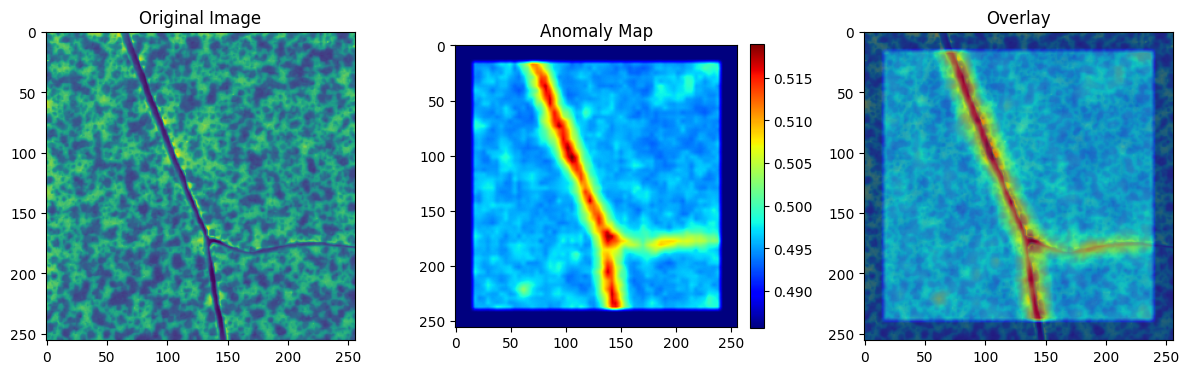

In [ ]:
# Get a sample image of tile
sample_anomaly_map_tile = predictions_EfAd['tile'][0]['anomaly_maps'][0].squeeze().cpu().numpy()
sample_image_tile = predictions_EfAd['tile'][0]['image'][0][0].numpy()
visualize_results(sample_image_tile, sample_anomaly_map_tile)

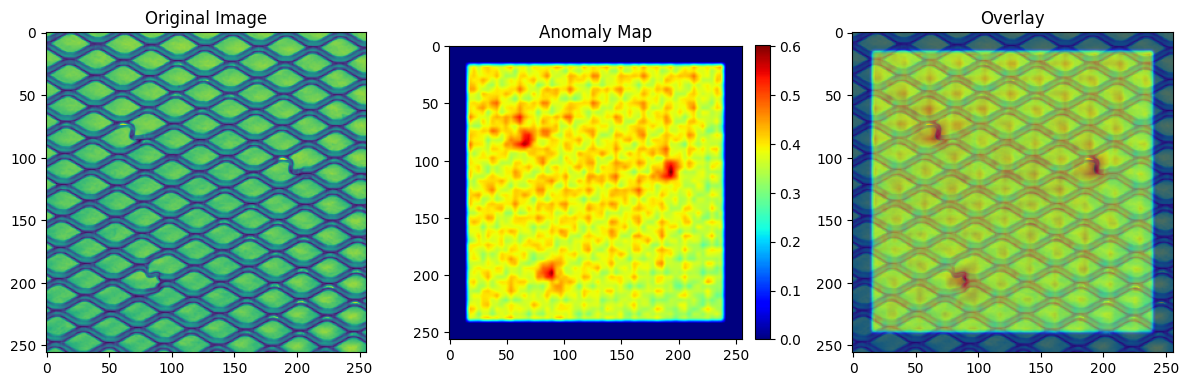

In [ ]:
# Get a sample image of grid
sample_anomaly_map_grid = predictions_EfAd['grid'][0]['anomaly_maps'][0].squeeze().cpu().numpy()
sample_image_grid = predictions_EfAd['grid'][0]['image'][0][0].numpy()
visualize_results(sample_image_grid, sample_anomaly_map_grid)

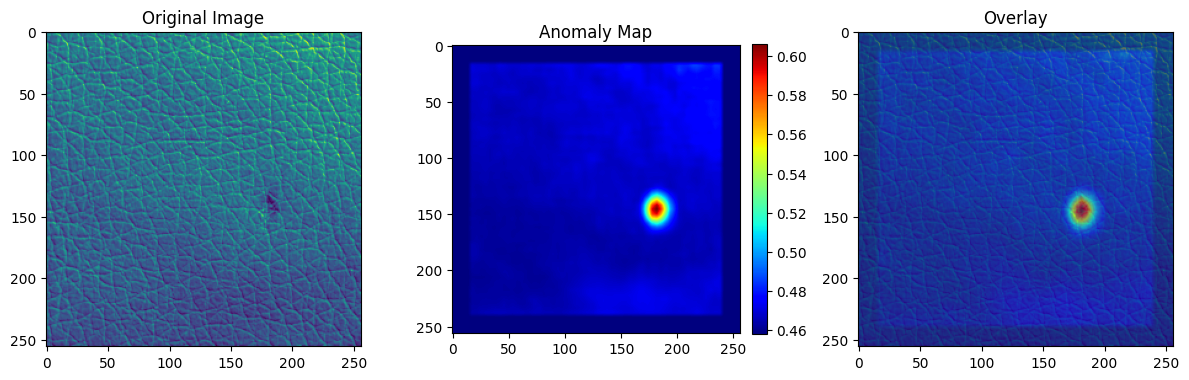

In [ ]:
# Get a sample image of leather
sample_anomaly_map_leather = predictions_EfAd['leather'][0]['anomaly_maps'][0].squeeze().cpu().numpy()
sample_image_leather = predictions_EfAd['leather'][0]['image'][0][0].numpy()
visualize_results(sample_image_leather, sample_anomaly_map_leather)

## *About EfficientAd*

EfficientAD is a breakthrough in anomaly detection, achieving over 95% accuracy in benchmarking. It surpasses existing methods in both accuracy and efficiency.

The EfficientAD model analyzed the image of tile, grid and leather.
The anomaly map reveals main areas of anomalies. The most significant hotspots have red spectrum on heatmap, corresponding to the normal image. This area shows high intensity in the anomaly map, suggesting potential anomaly.

EfficientAD drastically reduces the latency of processing one image from over 10ms to just 2ms. It can process up to 600 images per second, enabling fast handling of anomalies, evident from the above training part.

The model uses an EfficientNetB0 backbone, known for its balance of accuracy and efficiency. It employs a deep funnel architecture to enhance understanding of complex patterns in images.

EfficientAD uses an unsupervised learning approach. It's trained only on anomaly-free images from specific domains, making it versatile for different applications.

EfficientAD combines a student-teacher model for detecting anomalous local features with an autoencoder for identifying logical anomalies.

The model is particularly suited for manufacturing and industrial settings where rapid, accurate anomaly detection is crucial for productivity and safety.

EfficientAD addresses the need for low computational cost in real-world applications, making it suitable for scenarios with strict runtime limits due to high production rates.

# Patchcore

In [ ]:
# Initialize the model for each category

categories = ["tile", "grid", "leather"]
model_PtCore = {}
engine_PtCore={}
dataset_PtCore = {}
for category in categories:
    dataset_PtCore[category] = MVTec(root="path/to/mvtec", category=category, train_batch_size=1)
    model_PtCore[category] = Patchcore(pre_trained=True)
    engine_PtCore[category] = Engine(max_epochs=1)

    # Train the model
    engine_PtCore[category].fit(datamodule=dataset_PtCore[category], model=model_PtCore[category])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/276M [00:00<?, ?B/s]

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/core/optimizer.py:182: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer
INFO: 
  | Name                  | Type                     | Params | Mode 
---------------------------------------------------------------------------
0 | model                 | PatchcoreModel           | 24.9 M | train
1 | _transform            | Compose                  | 0      | train
2 | normalization_metric

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/optimization/automatic.py:132: `training_step` returned `None`. If this was on purpose, ignore this warning...


Validation: |          | 0/? [00:00<?, ?it/s]



Selecting Coreset Indices.:   0%|          | 0/18032 [00:00<?, ?it/s]

Selecting Coreset Indices.:   0%|          | 1/18032 [00:00<1:55:11,  2.61it/s]

Selecting Coreset Indices.:   0%|          | 7/18032 [00:00<16:46, 17.91it/s]  

Selecting Coreset Indices.:   0%|          | 14/18032 [00:00<09:25, 31.86it/s]

Selecting Coreset Indices.:   0%|          | 25/18032 [00:00<05:44, 52.27it/s]

Selecting Coreset Indices.:   0%|          | 36/18032 [00:00<04:29, 66.79it/s]

Selecting Coreset Indices.:   0%|          | 46/18032 [00:00<03:59, 75.09it/s]

Selecting Coreset Indices.:   0%|          | 55/18032 [00:01<03:53, 77.10it/s]

Selecting Coreset Indices.:   0%|          | 64/18032 [00:01<04:03, 73.76it/s]

Selecting Coreset Indices.:   0%|          | 72/18032 [00:01<04:14, 70.60it/s]

Selecting Coreset Indices.:   0%|          | 80/18032 [00:01<04:06, 72.90it/s]

Selecting Coreset Indices.:   0%|          | 88/18032 [00:01<04:06, 72.65it/s]

Selecting Coreset Indices.:   1%|          | 

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]



Selecting Coreset Indices.:   0%|          | 0/20697 [00:00<?, ?it/s]

Selecting Coreset Indices.:   0%|          | 8/20697 [00:00<04:34, 75.26it/s]

Selecting Coreset Indices.:   0%|          | 16/20697 [00:00<04:29, 76.65it/s]

Selecting Coreset Indices.:   0%|          | 27/20697 [00:00<03:54, 87.96it/s]

Selecting Coreset Indices.:   0%|          | 36/20697 [00:00<04:01, 85.59it/s]

Selecting Coreset Indices.:   0%|          | 47/20697 [00:00<03:51, 89.31it/s]

Selecting Coreset Indices.:   0%|          | 56/20697 [00:00<03:54, 87.86it/s]

Selecting Coreset Indices.:   0%|          | 65/20697 [00:00<04:04, 84.36it/s]

Selecting Coreset Indices.:   0%|          | 74/20697 [00:00<04:00, 85.77it/s]

Selecting Coreset Indices.:   0%|          | 83/20697 [00:00<04:12, 81.69it/s]

Selecting Coreset Indices.:   0%|          | 93/20697 [00:01<03:57, 86.76it/s]

Selecting Coreset Indices.:   0%|          | 102/20697 [00:01<04:01, 85.28it/s]

Selecting Coreset Indices.:   1%|          | 11

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]



Selecting Coreset Indices.:   0%|          | 0/19208 [00:00<?, ?it/s]

Selecting Coreset Indices.:   0%|          | 13/19208 [00:00<02:32, 126.23it/s]

Selecting Coreset Indices.:   0%|          | 26/19208 [00:00<02:44, 116.87it/s]

Selecting Coreset Indices.:   0%|          | 38/19208 [00:00<02:51, 111.98it/s]

Selecting Coreset Indices.:   0%|          | 50/19208 [00:00<02:51, 112.03it/s]

Selecting Coreset Indices.:   0%|          | 62/19208 [00:00<02:59, 106.45it/s]

Selecting Coreset Indices.:   0%|          | 73/19208 [00:00<03:14, 98.38it/s] 

Selecting Coreset Indices.:   0%|          | 83/19208 [00:00<03:28, 91.67it/s]

Selecting Coreset Indices.:   0%|          | 93/19208 [00:00<03:31, 90.52it/s]

Selecting Coreset Indices.:   1%|          | 103/19208 [00:01<03:32, 89.93it/s]

Selecting Coreset Indices.:   1%|          | 114/19208 [00:01<03:26, 92.39it/s]

Selecting Coreset Indices.:   1%|          | 126/19208 [00:01<03:13, 98.64it/s]

Selecting Coreset Indices.:   1%|     

In [13]:
results_PtCore = {}
predictions_PtCore = {}
for category in categories:
    # Perform inference
    predictions_PtCore[category] = engine_PtCore[category].predict(
        datamodule=dataset_PtCore[category],
        model=model_PtCore[category]
    )

    # Evaluate the model
    results_PtCore[category] = engine_PtCore[category].test(datamodule=dataset_PtCore[category], model=model_PtCore[category])

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9877344369888306     │
│       image_F1Score       │    0.9818181991577148     │
│        pixel_AUROC        │    0.9476341009140015     │
│       pixel_F1Score       │    0.6222663521766663     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9782790541648865     │
│       image_F1Score       │    0.9642857313156128     │
│        pixel_AUROC        │    0.9793799519538879     │
│       pixel_F1Score       │    0.3771977424621582     │
└───────────────────────────┴───────────────────────────┘

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │            1.0            │
│       image_F1Score       │     0.994535505771637     │
│        pixel_AUROC        │    0.9898858070373535     │
│       pixel_F1Score       │    0.44103074073791504    │
└───────────────────────────┴───────────────────────────┘

# *Results of Patchcore*

In [14]:
for category in categories:
  print(f"Category: {category}")
  print(f"Detection AUROC: {results_PtCore[category][0]['image_AUROC']}")
  print(f"Segmentation AUROC: {results_PtCore[category][0]['pixel_AUROC']}\n")

Category: tile
Detection AUROC: 0.9877344369888306
Segmentation AUROC: 0.9476341009140015

Category: grid
Detection AUROC: 0.9782790541648865
Segmentation AUROC: 0.9793799519538879

Category: leather
Detection AUROC: 1.0
Segmentation AUROC: 0.9898858070373535



In [124]:
total_auroc = 0
for category in categories:
  total_auroc += results_PtCore[category][0]['image_AUROC']  # Using image_AUROC
avg_auroc = total_auroc / len(categories)
print(f"Average AUROC across categories (Patchcore): {avg_auroc}")

Average AUROC across categories (Patchcore): 0.9886711637179056


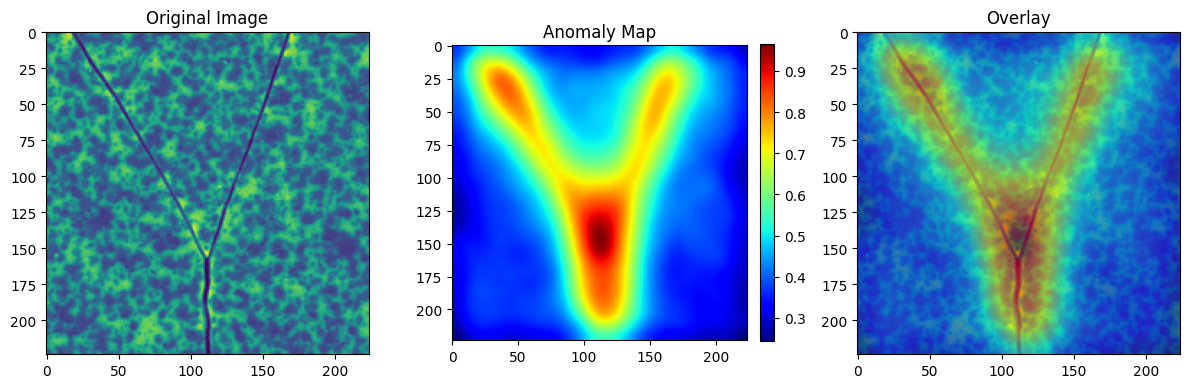

In [20]:
# Get a sample image of tile
sample_anomaly_map_tile = predictions_PtCore['tile'][0]['anomaly_maps'][1].squeeze().cpu().numpy()
sample_image_tile = predictions_PtCore['tile'][0]['image'][1][1].numpy()
visualize_results(sample_image_tile, sample_anomaly_map_tile)

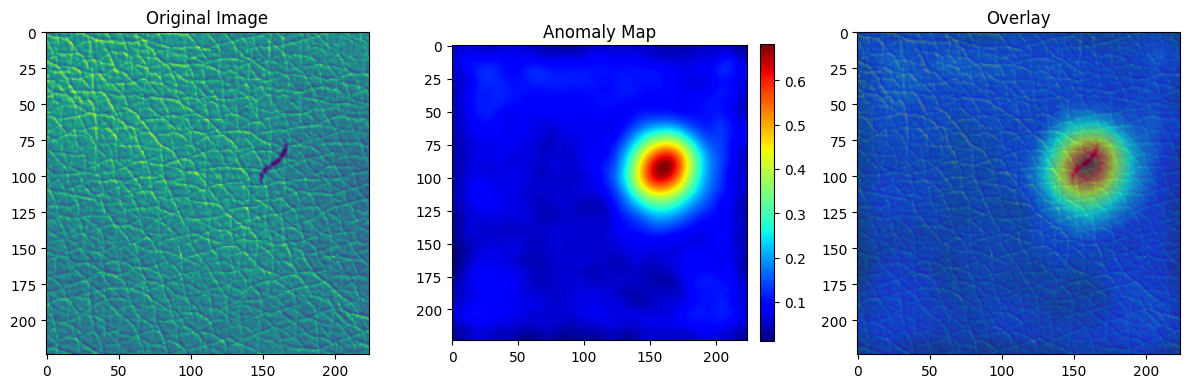

In [18]:
# Get a sample image of tile
sample_anomaly_map_leather = predictions_PtCore['leather'][0]['anomaly_maps'][1].squeeze().cpu().numpy()
sample_image_leather = predictions_PtCore['leather'][0]['image'][1][1].numpy()
visualize_results(sample_image_leather, sample_anomaly_map_leather)

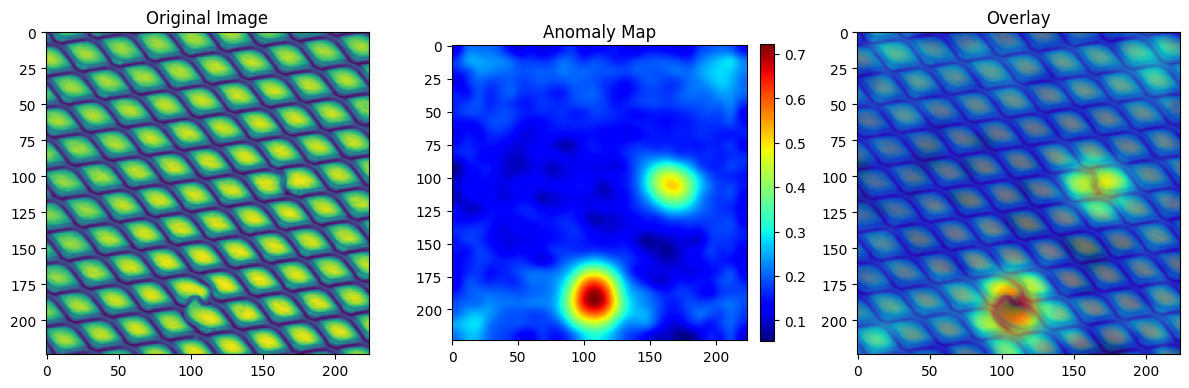

In [19]:
# Get a sample image of tile
sample_anomaly_map_grid = predictions_PtCore['grid'][0]['anomaly_maps'][1].squeeze().cpu().numpy()
sample_image_grid = predictions_PtCore['grid'][0]['image'][1][1].numpy()
visualize_results(sample_image_grid, sample_anomaly_map_grid)

# *About Patchcore*

Patchcore is an algorithm designed for detecting anomalies in images. It works by breaking down images into smaller patches and comparing each patch to a core set of normal patches.

The Patchcore model analyzed the image of tile, grid and leather.
The anomaly map reveals main areas of anomalies. The most significant hotspots have red spectrum on heatmap, corresponding to the normal image. This area shows high intensity in the anomaly map, suggesting potential anomaly.

PatchCore extracts locally aware features from patches of normal images.
It applies a subsampling technique (coreset*) to approximate these features and build a bank of patch features that describe normal patterns.
At testing time, patch features are extracted for the test sample and anomaly scores are computed using a nearest-neighbor approach

* **Coresets**: A coreset is a small, representative subset of the original dataset that can be used to approximate the solution to an optimization problem. This allows for significant reductions in computational complexity and memory requirements, making it easier to train models on large datasets.



# Differences between EfficientAd and Patchcore

Industrial Application**(Important):

Both are suitable for industrial applications, but EfficientAD's speed makes it particularly well-suited for high-speed, real-time inspection tasks.

EfficientAd uses student-teacher approach to detect anomalies, which are able to detect both structural (local) and logical (global) anomalies. It makes it suitable for real-time applications.

Patchcore is slower than EfficientAd as it uses coreset-subsampling. It is better suited for detecting fine-grained, localized anomalies.


---


Approach:

PatchCore - It uses a patch-based, memory bank approach. It breaks down images into smaller patches and compares them to a core set of normal patches.

EfficientAD - It uses a combination of a student-teacher model for local anomalies and an autoencoder for logical anomalies.


---


Architecture:

PatchCore - It uses a pre-trained CNN (like ResNet) as a feature extractor, focusing on mid-level features.

EfficientAD - It introduces a Patch Description Network (PDN) for local feature extraction and includes an autoencoder network.



---



Training:

PatchCore - It doesn't require fine-tuning of the feature extractor. It creates a memory bank of normal patch features.

EfficientAD - It involves training both the student-teacher model and the autoencoder.



---


Anomaly Detection Method:

PatchCore - It uses a nearest-neighbor approach to detect anomalies, comparing test patches to the memory bank.

EfficientAD - It combines local anomaly detection (using the student-teacher model) with logical anomaly detection (using the autoencoder).



---



Speed:

EfficientAD is noted for its extremely fast processing speed, capable of handling up to 600 images per second.

PatchCore, while efficient, may not be as fast as EfficientAD due to its nearest-neighbor computations.

# Similarity Search




In [108]:
from qdrant_client import QdrantClient, models
from qdrant_client.http import models as rest
import numpy as np
import torch

In [109]:
client = QdrantClient(":memory:") # Connect to in-memory Qdrant instance

#### *For EfficientAd*

In [110]:
client.recreate_collection(
    collection_name="anomaly_maps_features",
    vectors_config=models.VectorParams(
        size=predictions_EfAd['tile'][0]['anomaly_maps'][0].flatten().shape[0],  # Adjust size
        distance=rest.Distance.COSINE
    ),
)

<ipython-input-110-790b729ccf02>:1: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  client.recreate_collection(


True

In [111]:
# Function to extract and flatten anomaly maps
def extract_anomaly_map_features(predictions, category, index):
    anomaly_map = predictions[category][0]['anomaly_maps'][index].cpu().numpy()
    return anomaly_map.flatten()

In [115]:
import uuid

all_points = []  # List to store all points
for category in categories:
    for i in range(len(predictions_EfAd[category][0]['anomaly_maps'])):
        features = extract_anomaly_map_features(predictions_EfAd, category, i)
        unique_id = str(uuid.uuid4())
        point = models.PointStruct(
            id=unique_id,
            vector=features.tolist(),
            payload={"category": category, "index": i}
        )
        all_points.append(point)

# Upsert all points at once
client.upsert(
    collection_name="anomaly_maps_features",
    points=all_points,
)

UpdateResult(operation_id=0, status=<UpdateStatus.COMPLETED: 'completed'>)

In [116]:
# Function to perform similarity search and visualize results
def similarity_search(query_anomaly_map, predictions, top_k=5):
    query_features = query_anomaly_map.flatten()
    search_result = client.search(
        collection_name="anomaly_maps_features",
        query_vector=query_features.tolist(),
        limit=top_k
    )

    return search_result

Query Image:


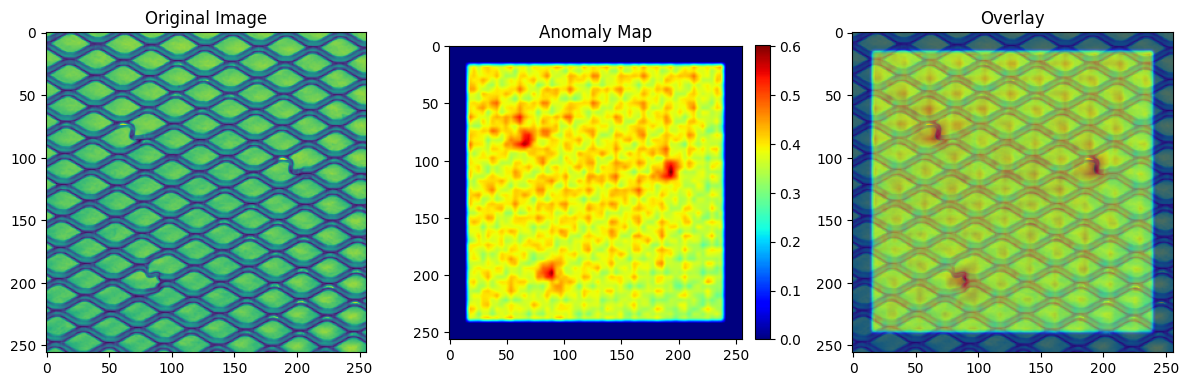


Top 5 Similar Anomalies:


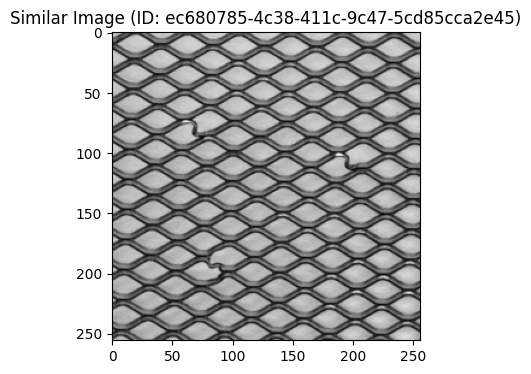

ID: ec680785-4c38-411c-9c47-5cd85cca2e45, Score: 0.9999999998851022, Payload: {'category': 'grid', 'index': 0}



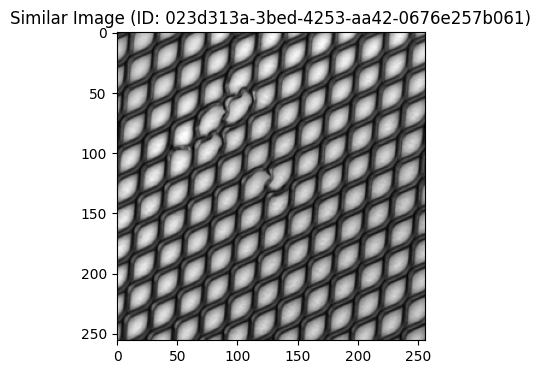

ID: 023d313a-3bed-4253-aa42-0676e257b061, Score: 0.9955063111052465, Payload: {'category': 'grid', 'index': 9}



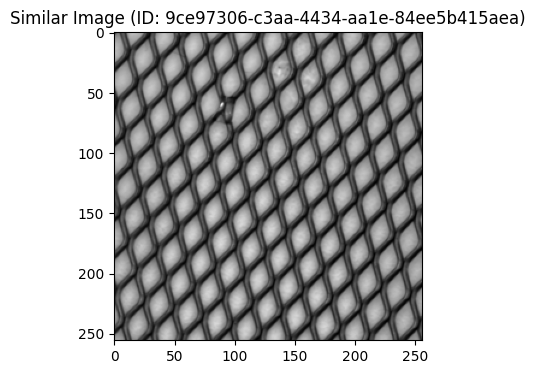

ID: 9ce97306-c3aa-4434-aa1e-84ee5b415aea, Score: 0.9946096837524808, Payload: {'category': 'grid', 'index': 26}



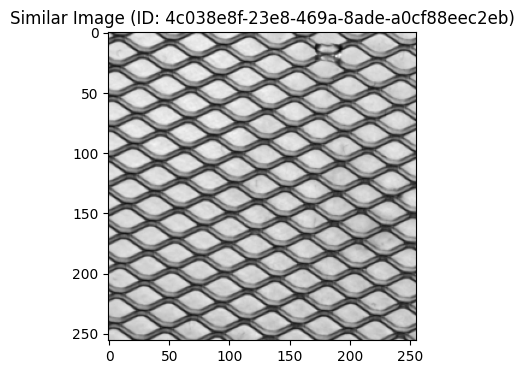

ID: 4c038e8f-23e8-469a-8ade-a0cf88eec2eb, Score: 0.9941875618832303, Payload: {'category': 'grid', 'index': 24}



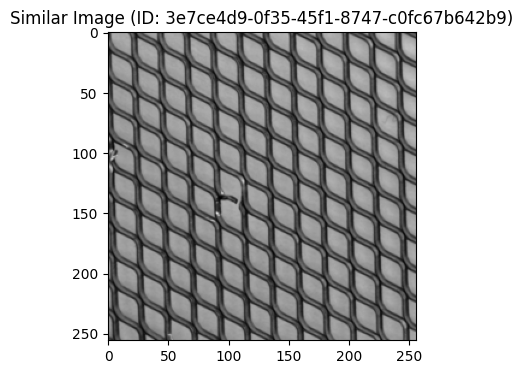

ID: 3e7ce4d9-0f35-45f1-8747-c0fc67b642b9, Score: 0.9940572006407385, Payload: {'category': 'grid', 'index': 14}



In [117]:
category = 'grid'
index = 0
sample_anomaly_map = predictions_EfAd[category][0]['anomaly_maps'][index].squeeze().cpu().numpy()
search_results = similarity_search(sample_anomaly_map, predictions_EfAd)

print("Query Image:")
visualize_results(predictions_EfAd[category][0]['image'][0][index].numpy(), sample_anomaly_map)

print(f"\nTop 5 Similar Anomalies:")
for result in search_results:
  category = result.payload.get("category")
  i = result.payload.get("index")

  # Retrieve the original image and anomaly map using category and index
  original_image = predictions_EfAd[category][0]['image'][i][index].numpy()
  retrieved_anomaly_map = predictions_EfAd[category][0]['anomaly_maps'][0].cpu().numpy()

  # Visualize the retrieved image and anomaly map separately
  plt.figure(figsize=(6, 4))
  plt.imshow(np.squeeze(original_image), cmap='grey')
  plt.title(f"Similar Image (ID: {result.id})")
  plt.axis('on')
  plt.show()

  print(f"ID: {result.id}, Score: {result.score}, Payload: {result.payload}\n")



### *For Patchcore*

In [118]:
client.recreate_collection(
    collection_name="anomaly_maps_features",
    vectors_config=models.VectorParams(
        size=predictions_PtCore['tile'][0]['anomaly_maps'][0].flatten().shape[0],  # Adjust size
        distance=rest.Distance.COSINE
    ),
)

<ipython-input-118-ec618f79ae7e>:1: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  client.recreate_collection(


True

In [119]:
# Function to extract and flatten anomaly maps
def extract_anomaly_map_features(predictions, category, index):
    anomaly_map = predictions[category][0]['anomaly_maps'][index].cpu().numpy()
    return anomaly_map.flatten()

In [120]:
import uuid

all_points = []  # List to store all points
for category in categories:
    for i in range(len(predictions_PtCore[category][0]['anomaly_maps'])):
        features = extract_anomaly_map_features(predictions_PtCore, category, i)
        unique_id = str(uuid.uuid4())
        point = models.PointStruct(
            id=unique_id,
            vector=features.tolist(),
            payload={"category": category, "index": i}
        )
        all_points.append(point)

# Upsert all points at once
client.upsert(
    collection_name="anomaly_maps_features",
    points=all_points,
)


UpdateResult(operation_id=0, status=<UpdateStatus.COMPLETED: 'completed'>)

In [121]:
# Function to perform similarity search and visualize results
def similarity_search(query_anomaly_map, predictions, top_k=5):
    query_features = query_anomaly_map.flatten()
    search_result = client.search(
        collection_name="anomaly_maps_features",
        query_vector=query_features.tolist(),
        limit=top_k
    )

    return search_result

Query Image:


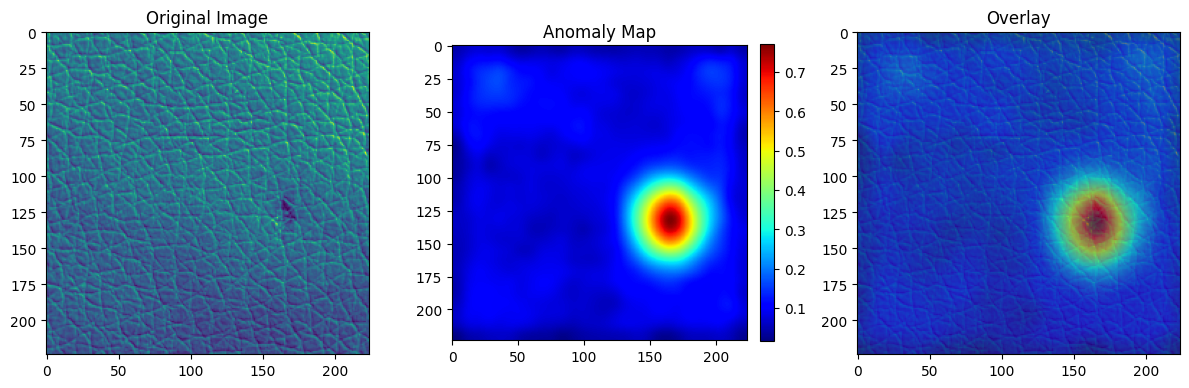


Top 5 Similar Anomalies:


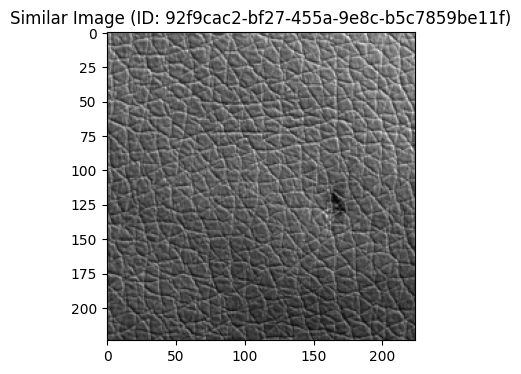

ID: 92f9cac2-bf27-455a-9e8c-b5c7859be11f, Score: 1.0000000880295876, Payload: {'category': 'leather', 'index': 0}



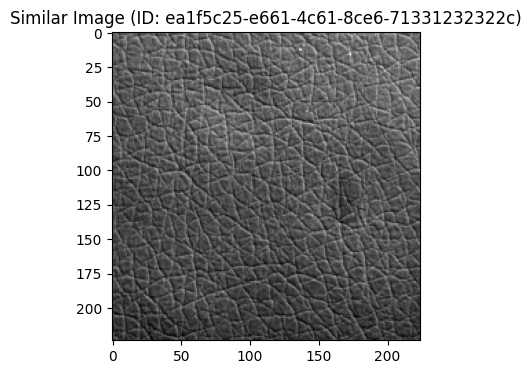

ID: ea1f5c25-e661-4c61-8ce6-71331232322c, Score: 0.9519248088822032, Payload: {'category': 'leather', 'index': 8}



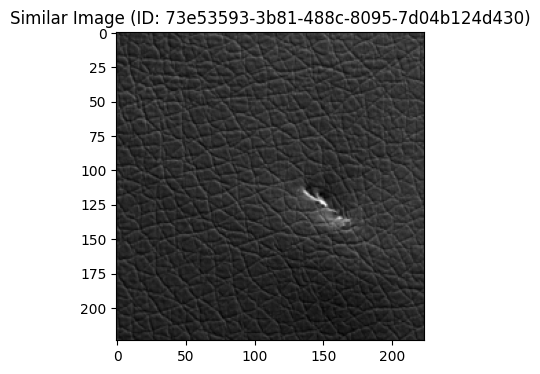

ID: 73e53593-3b81-488c-8095-7d04b124d430, Score: 0.947419695707213, Payload: {'category': 'leather', 'index': 27}



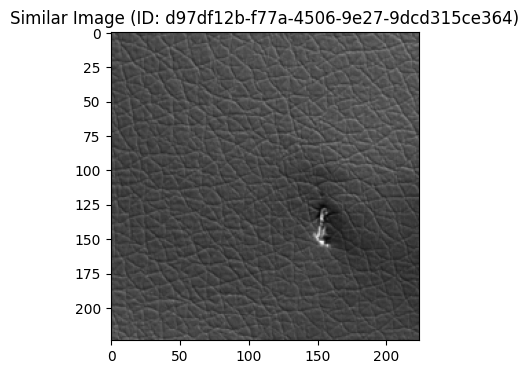

ID: d97df12b-f77a-4506-9e27-9dcd315ce364, Score: 0.9282036343639394, Payload: {'category': 'leather', 'index': 26}



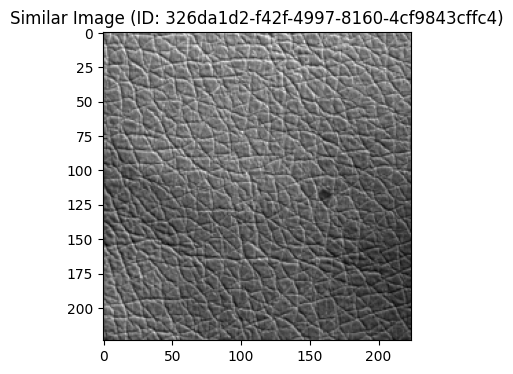

ID: 326da1d2-f42f-4997-8160-4cf9843cffc4, Score: 0.9021992736605775, Payload: {'category': 'leather', 'index': 12}



In [122]:
category = 'leather'
index = 0
sample_anomaly_map = predictions_PtCore[category][0]['anomaly_maps'][index].squeeze().cpu().numpy()
search_results = similarity_search(sample_anomaly_map, predictions_PtCore)

print("Query Image:")
visualize_results(predictions_PtCore[category][0]['image'][0][index].numpy(), sample_anomaly_map)

print(f"\nTop 5 Similar Anomalies:")
for result in search_results:
  category = result.payload.get('category')
  i = result.payload.get('index')

  # Retrieve the original image and anomaly map using category and index
  original_image = predictions_PtCore[category][0]['image'][i][index].numpy()
  retrieved_anomaly_map = predictions_PtCore[category][0]['anomaly_maps'][0].cpu().numpy()

  # Visualize the retrieved image and anomaly map separately
  plt.figure(figsize=(6, 4))
  plt.imshow(np.squeeze(original_image), cmap='grey')
  plt.title(f"Similar Image (ID: {result.id})")
  plt.axis('on')
  plt.show()

  print(f"ID: {result.id}, Score: {result.score}, Payload: {result.payload}\n")



### About Similarity Search

Similarity search aims to find items within a dataset that are most similar to a given query item. This is based on a notion of "similarity" which is often defined using a distance metric (in this case it is COSINE).

Feature Extraction: Anomaly maps generated by EfficientAd and Patchcore are converted into feature vectors by flattening the anomaly map array. These vectors capture the spatial distribution of anomalies.

Vector Database: Qdrant is used to store these feature vectors along with metadata about the original images (category, index). Qdrant provides efficient indexing for fast similarity search.

Querying: When a new anomaly map is generated, it's also converted into a feature vector and used as a query against the Qdrant database.

Retrieval: Qdrant returns the most similar anomaly map vectors (and their associated image metadata) based on cosine similarity.

Visualization: The retrieved images are displayed, allowing you to see visually similar anomaly patterns.
